#GRIP - TSF | Data Science & Business Analytics Internship
## Task 2 : Exploratory Data Analysis (Retail)

Author : mahmoud mohamed abdelwahab 

Task :
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?
* Dash Boards- explaining the charts and interpretations

####import the useful libraries


In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

upload dataset 

In [77]:
df=pd.read_csv("SampleSuperstore.csv")
df.head(100)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Standard Class,Home Office,United States,Portland,Oregon,97206,West,Office Supplies,Binders,5.6820,1,0.70,-3.7880
96,Second Class,Home Office,United States,New York City,New York,10009,East,Furniture,Furnishings,96.5300,7,0.00,40.5426
97,First Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Binders,51.3120,3,0.20,17.9592
98,Standard Class,Corporate,United States,Saint Paul,Minnesota,55106,Central,Office Supplies,Appliances,77.8800,6,0.00,22.5852


**Data Cleaning** checking dataframe 

1-Missing Values

2-Incorrect Format

3-Incorrect Headers

4-Anomalies/Outliers

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [79]:
#check missing values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

don't exit missing values

In [80]:
#check duplicated rows
bool_series = df.duplicated()
bool_series.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [81]:
# check duplicated values
df[df.duplicated(keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [82]:
# drop duplicated values
df.drop_duplicates(inplace=True)

In [83]:
#check second interation 
df[df.duplicated(keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


**don't exist duplicates vaules in dataframe**


**checking uniques columns in dataframe**




In [84]:
#checking uniques columns in dataframe
df['Ship Mode'].unique()


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [85]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [86]:
df['Country'].unique()

array(['United States'], dtype=object)

In [87]:
df['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [88]:
df['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [89]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [90]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [91]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [92]:
df['Sales'].unique()

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

In [93]:
df['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [94]:
df['Profit'].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

I note that the country column is the only one that is unique

In [95]:
df.drop(['Country'],axis=1,inplace=True)

In [96]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


 drop useless features like  postal code

In [97]:
df.drop(["Postal Code"],axis=1,inplace=True)

In [98]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**finished data cleaning for dataframe**

# **Exploratory Data Analysis**

check Correlation 


<AxesSubplot:>

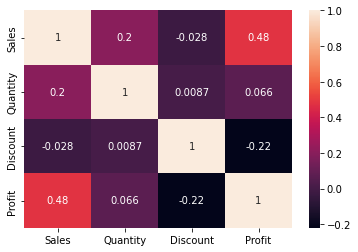

In [65]:
figure_1=df.corr()
sns.heatmap(figure_1,annot=True)

we notice there's correlation between (profit, discount) and (profit, sales) and (quantity, sales)



# We can analyse the data further in 3 different ways

## 1)Sales ,Profit ,Discount Analysis at each Level

## 2)Product Category Level Analysis

## 3) Geographic Level Analysis

# 1) Sales Vs Profit Vs Discount
**a) Based on Region**

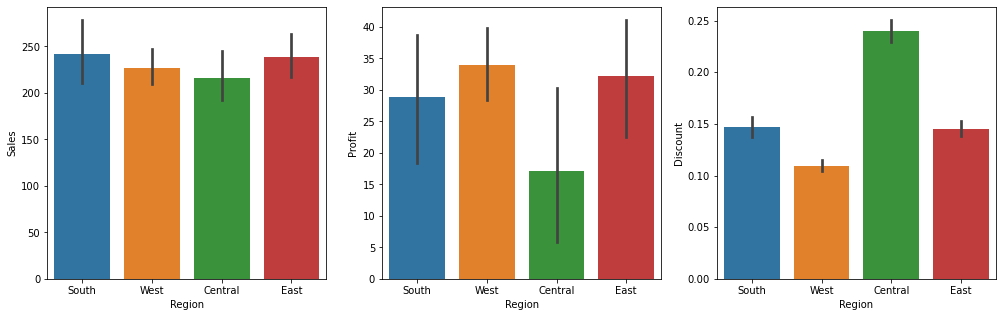

In [66]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Region',y='Sales',data=df,ax=ax[0])
sns.barplot(x='Region',y='Profit',data=df,ax=ax[1])
sns.barplot(x='Region',y='Discount',data=df,ax=ax[2])
plt.show()

* Though the Sales is Souther region is high
* The Profits are highest in Western region Because of low Discounts
* Central region has highest discount, probably the reason for lowest profits




**b)based Category**

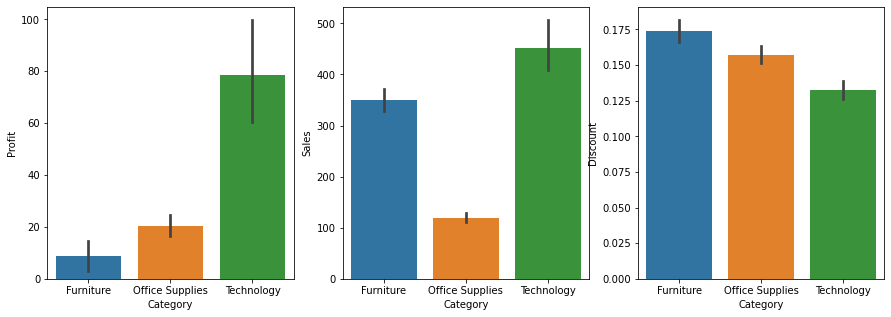

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Category', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Category', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Category', y='Discount', data=df, ax=ax[2])
plt.show()

**c)based Segment**

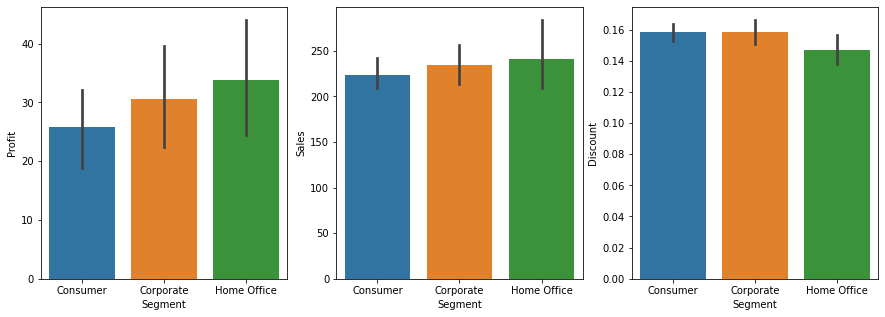

In [68]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Segment', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Segment', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Segment', y='Discount', data=df, ax=ax[2])
plt.show()

high profit in home office because home office is less discount

small profit in customer because greater discount in consumer

**D)based Ship Mode**

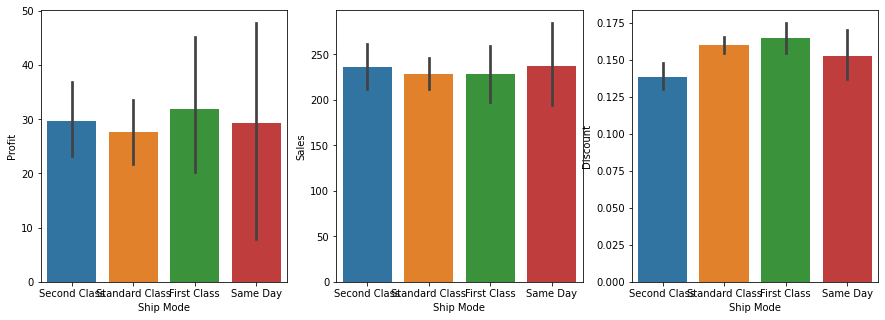

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Ship Mode', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Ship Mode', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data=df, ax=ax[2])
plt.show()

high profit in first class and high discount 

**E)based Quantity**

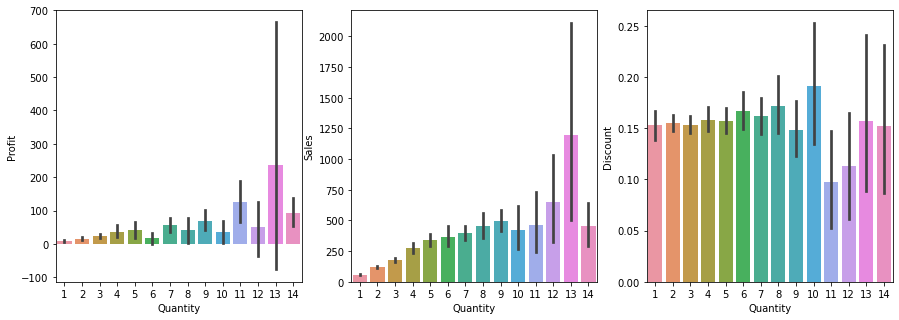

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x='Quantity', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Quantity', y='Sales', data=df, ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data=df, ax=ax[2])
plt.show()

Quantity num 13 is higher profit and higher sales

Quantity num 1 is lower profit and lower sales

Quantity num 10 is low but num 10 is higher discount

we need to balance between quantity and discount


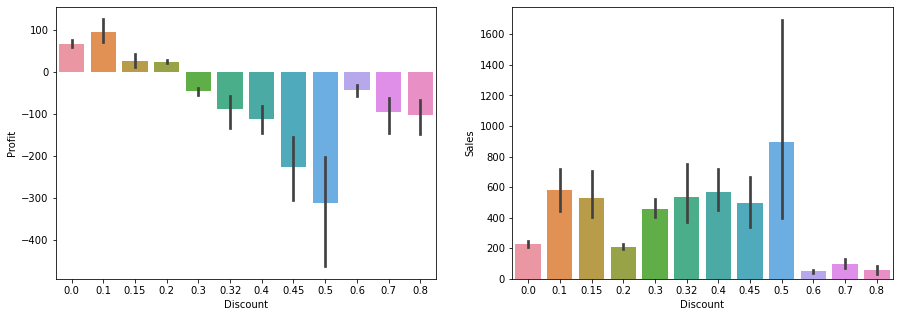

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='Discount', y='Profit', data=df, ax=ax[0])
sns.barplot(x='Discount', y='Sales', data=df, ax=ax[1])
plt.show()

As the Discount is increasing the profits are going into negative. 

# 2)Category Level Analysis

Check Category and Sub-Category

check number of each category

In [72]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

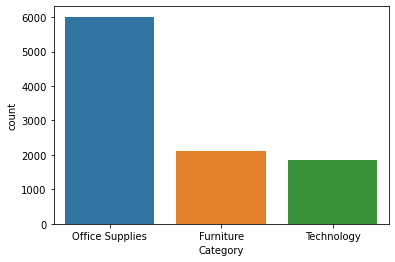

In [73]:
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index);


Office Supplies has the highest number


###  Total Categories by Percentage

<AxesSubplot:ylabel='Category'>

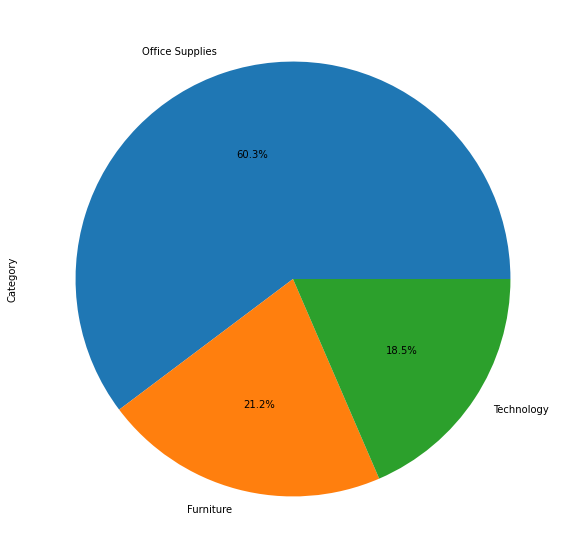

In [41]:
plt.figure(figsize=(10,10))
df['Category'].value_counts().plot.pie(autopct="%1.1f%%")

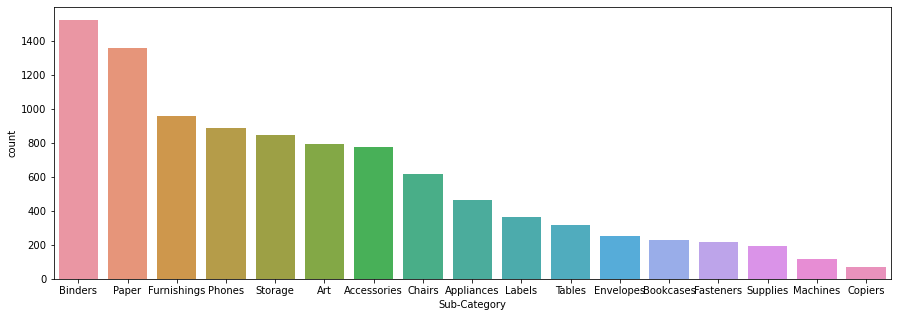

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5)) #because larger plot 
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index);


Sales of Binders as Paper are the highest


###  Total Sub-Categories by Percentage


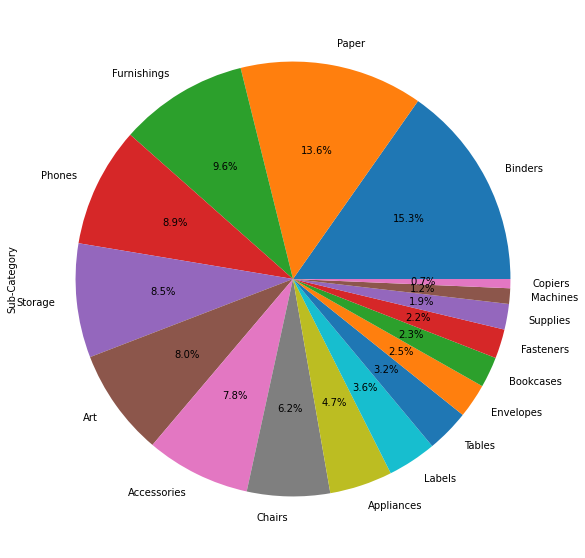

In [75]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.


### check category with discount and profit


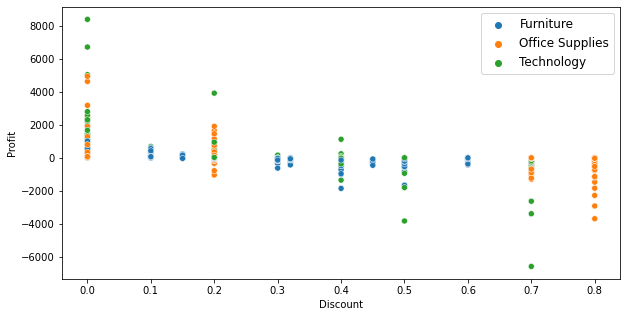

In [101]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df);
ax.legend(fontsize=12)
plt.show()

Office Supplies has maximum loss at 80% discount

Furniture and Technology have maximum loss between 30% to 50%

Technology also has maximum loss profit at 70%

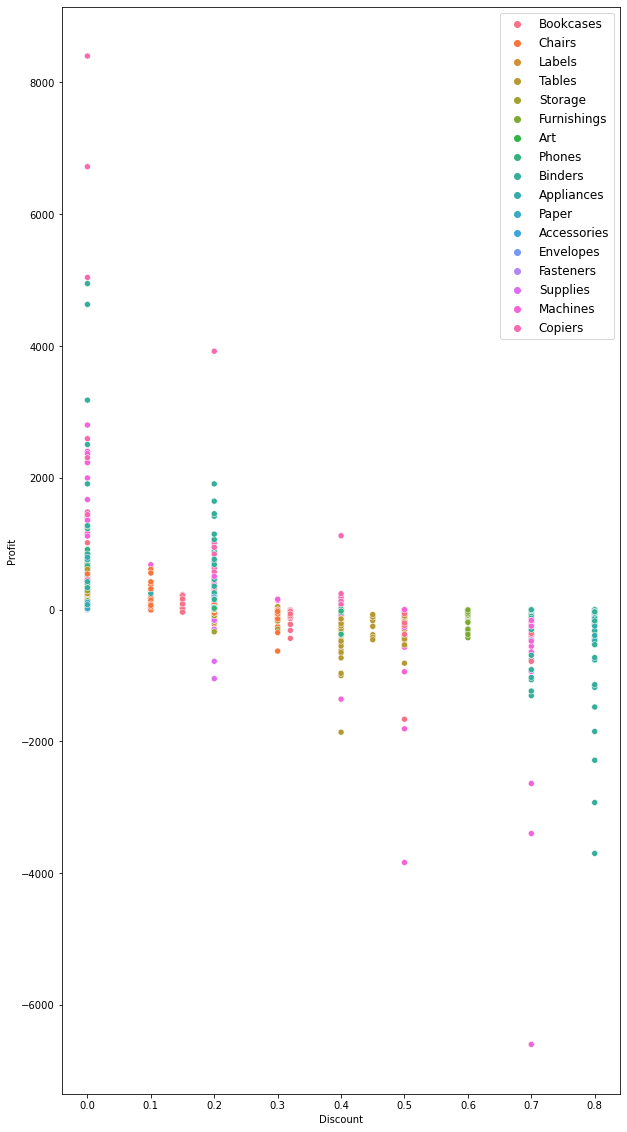

In [103]:
fig, ax = plt.subplots(figsize=(10,20))
sns.scatterplot(x='Discount', y='Profit', hue='Sub-Category', data=df);
ax.legend(fontsize=12)
plt.show()

blinder is lower profit in maximam 80% discount


# 3) Geographic Level Analysis

In [106]:
# group by with each state
states = df.groupby('State').sum().sort_values('Sales', ascending=False)
states.reset_index(inplace=True)

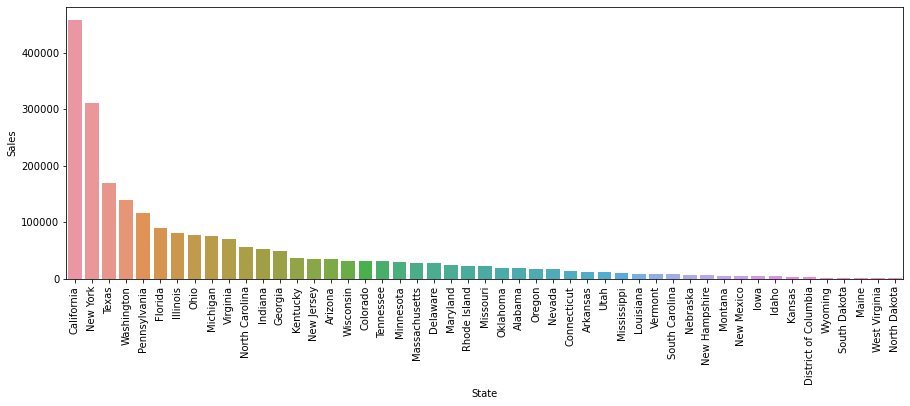

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Sales', data=states);
plt.xticks(rotation=90)
plt.show()


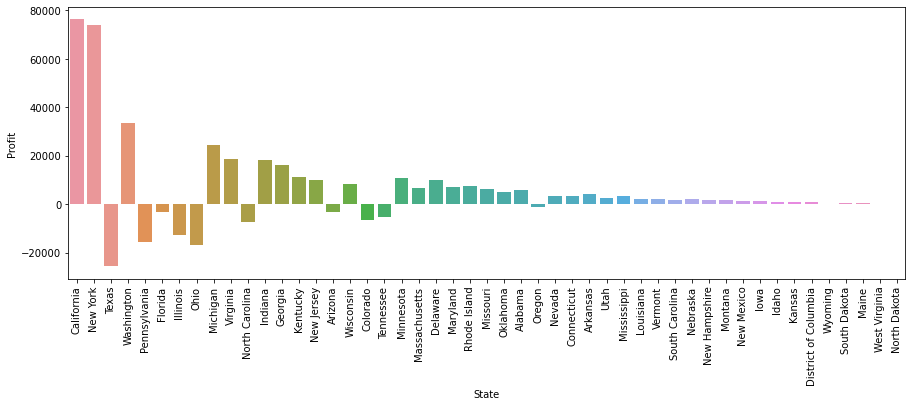

In [109]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='State', y='Profit', data=states);
plt.xticks(rotation=90)
plt.show()

the califonia is higher sales and higher profit 

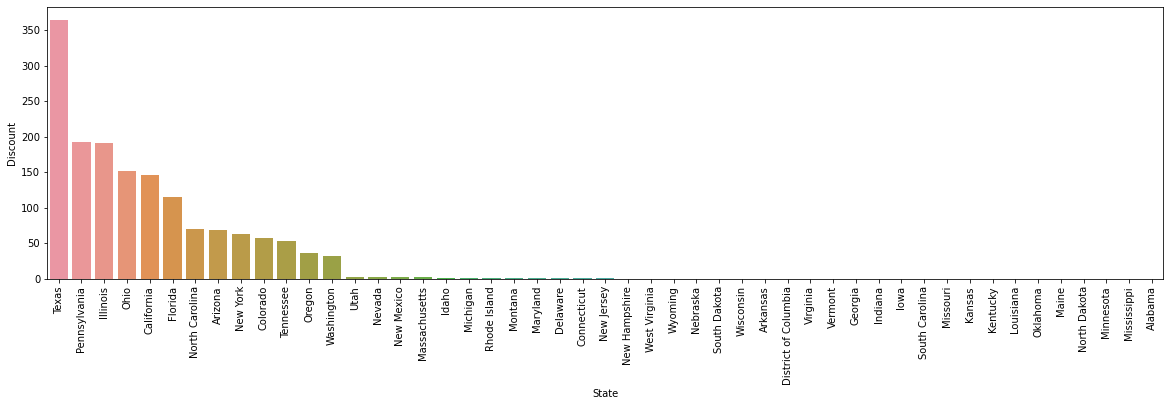

In [112]:
states= df.groupby(['State']).sum().sort_values('Discount', ascending=False)
states.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x='State', y='Discount', data=states)
plt.xticks(rotation=90)
plt.show();

higher dicount in state lower profit

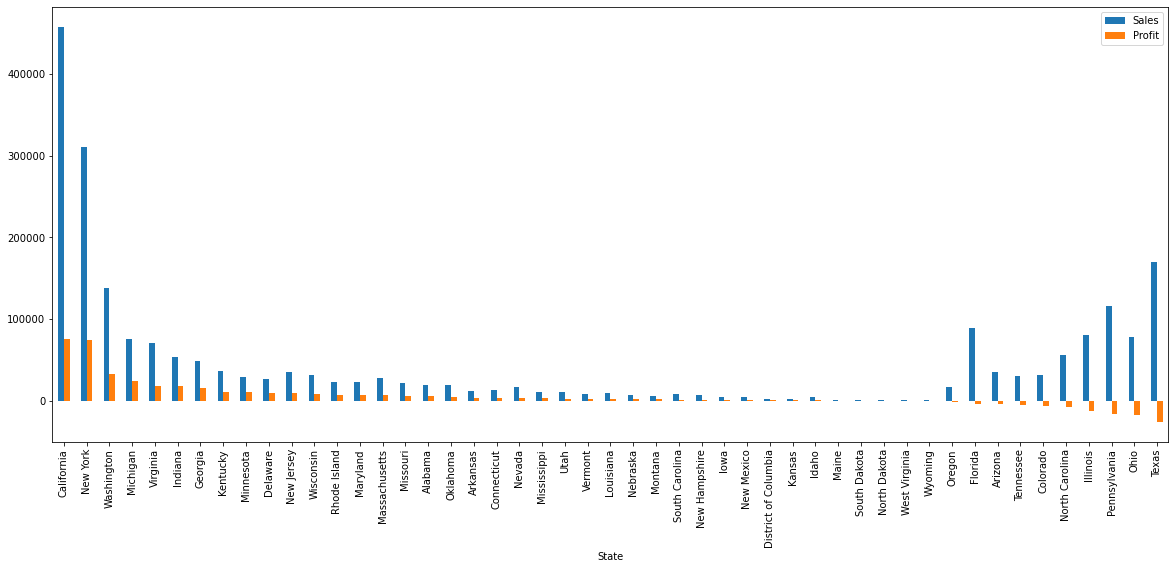

In [113]:
states= df.groupby(['State'])[['Sales', 'Profit']].sum()
states.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.show()

The relation between sales and profits is not always linear. In some states , we can see the sales are in peak but the profits are not.



# OBSERVATIONS
 ## Weak areas where Manager can work to make more profit ?

Profits and Sales are not Linear in most of the states.

Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.

Central region needs to be given more attention.

Machines and supplies are having less profit and are a loss making sub-category.

Furnitures are not providing much profit margin.

Higher discounts are not of much use, the profit are in negative and even the sales are having downtrend after 60% discount.

The Office Supplies has maximum loss at 80% and 0% discount.

Furniture and Technology had maximum loss at lower Discount rates

## What all business problems you can derive by exploring the data?
### 1) How to maximise the PROFITS along with Sales improvement?

TECHNOLOGY gives more profit compared to furniture category.

Profits can be maximised if the Ship mode is 'Same day'.

Western region has more profit margins, by analysing the marketing stratergies the profit of other regions and be increased.

Vermont state is having high profit margin even though the sales are not high, marketing strategies analysis needs to be performed.

Discount less than or equal to 50% is having highest sales and profit marging.

Provide optimal Discount to Technology and Furniture to attract much customers

The Top 5 Sub-Categories account to ~50% of the Sales, suggesting need for accelerated marketing Strategies or introducing additional Products in those categories.

In Segments, Home-office has High Profit & sales, suggest to promote more for higher profits

### 2) Improve Inventory

As furniture has low profit margin and have more storage cost, they can be sold on long waiting period,as people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.
The stock of Office Supplies and Technology can be improved for the same price of Furniture storage.